In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import yasa

In [41]:
psg_file = "data/SC4001E0-PSG.edf"
raw = mne.io.read_raw_edf(psg_file, preload = True)

raw.info["ch_names"]

Extracting EDF parameters from C:\Users\camen\Documents\GitHub\sleep-classification-project\data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


C:\Users\camen\AppData\Local\Temp\ipykernel_6320\2887252656.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload = True)
C:\Users\camen\AppData\Local\Temp\ipykernel_6320\2887252656.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload = True)
C:\Users\camen\AppData\Local\Temp\ipykernel_6320\2887252656.py:2: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload = True)


['EEG Fpz-Cz',
 'EEG Pz-Oz',
 'EOG horizontal',
 'Resp oro-nasal',
 'EMG submental',
 'Temp rectal',
 'Event marker']

In [42]:
hypnogram_file = "data/SC4001EC-Hypnogram.edf"
annotations = mne.read_annotations(hypnogram_file)
raw.set_annotations(annotations)

C:\Users\camen\AppData\Local\Temp\ipykernel_6320\3655939819.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

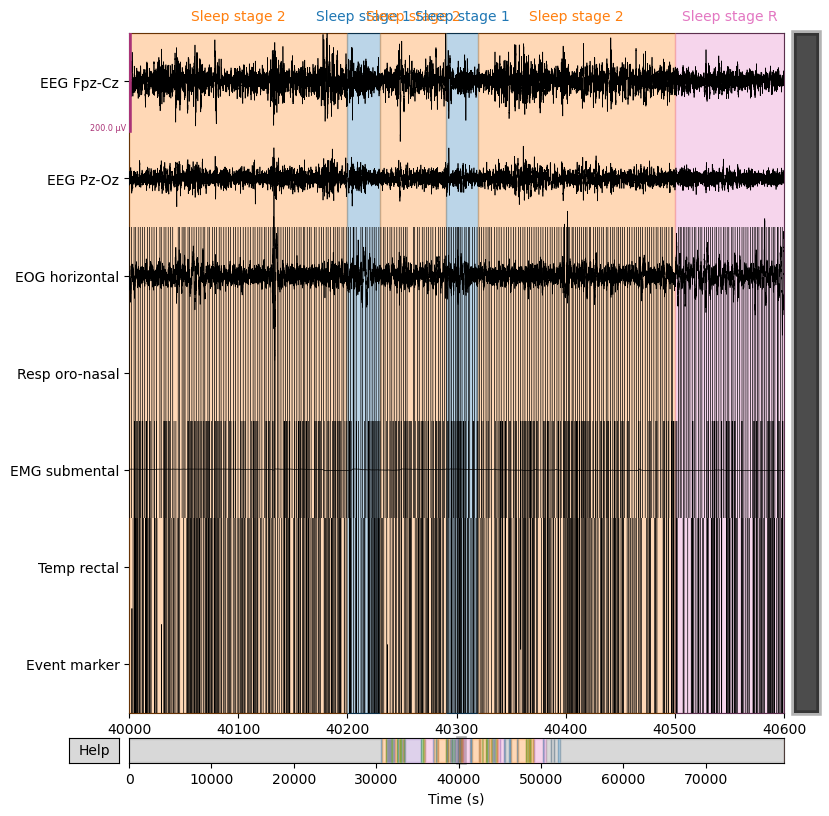

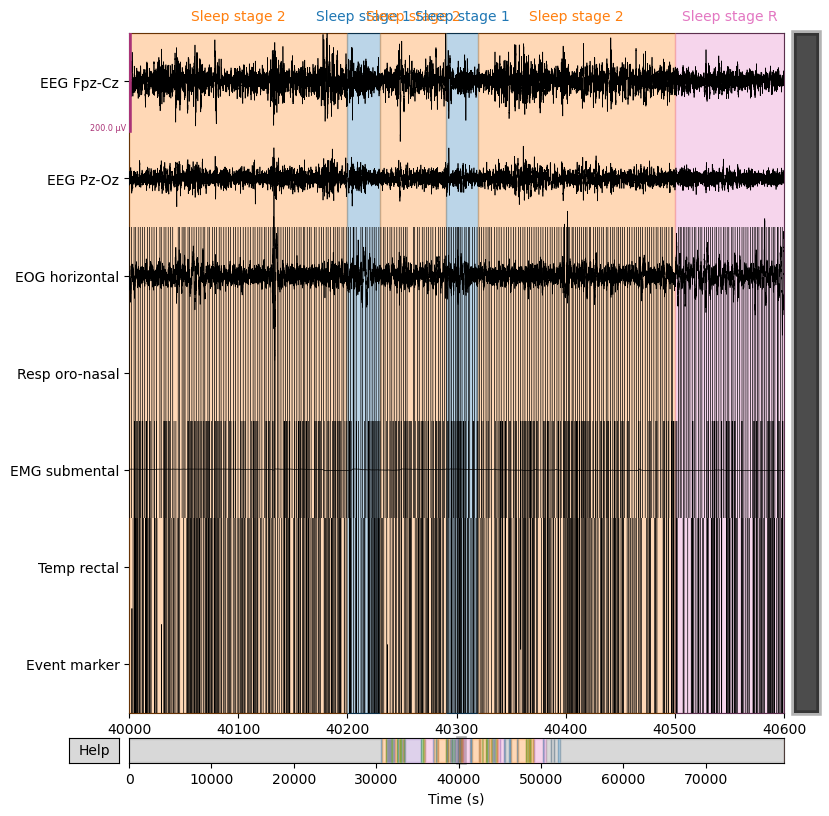

In [43]:
raw.plot(scalings = dict(eeg=1e-4, resp=1e-4, eog=1e-4, emg=1e-7, misc=1e-10), start = 40000, duration = 600)

In [45]:
print(raw.annotations)

<Annotations | 154 segments: Sleep stage 1 (24), Sleep stage 2 (40), Sleep ...>


In [48]:
print(raw.ch_names)

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [50]:
raw.drop_channels(["EOG horizontal", "Resp oro-nasal", "EMG submental", "Temp rectal", "Event marker"])

<RawEDF | SC4001E0-PSG.edf, 2 x 7950000 (79500.0 s), ~121.3 MiB, data loaded>

In [51]:
print(raw.info["sfreq"])

100.0


In [52]:
raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



<RawEDF | SC4001E0-PSG.edf, 2 x 7950000 (79500.0 s), ~121.3 MiB, data loaded>

In [53]:
data = raw.get_data(units = "uV")
print(data.shape)
#raw.plot(scalings=dict(eeg=1e-4));

(2, 7950000)


In [58]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage ?'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


In [60]:
epochs = mne.make_fixed_length_epochs(raw, duration=30.0, preload=True)

Not setting metadata
2650 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2650 events and 3000 original time points ...
0 bad epochs dropped


In [61]:
epochs

<Epochs | 2650 events (all good), 0 – 29.99 s (baseline off), ~121.3 MiB, data loaded,
 '1': 2650>

In [62]:
raw.info['ch_names']

['EEG Fpz-Cz', 'EEG Pz-Oz']

In [ ]:
channel_names = raw.ch_names


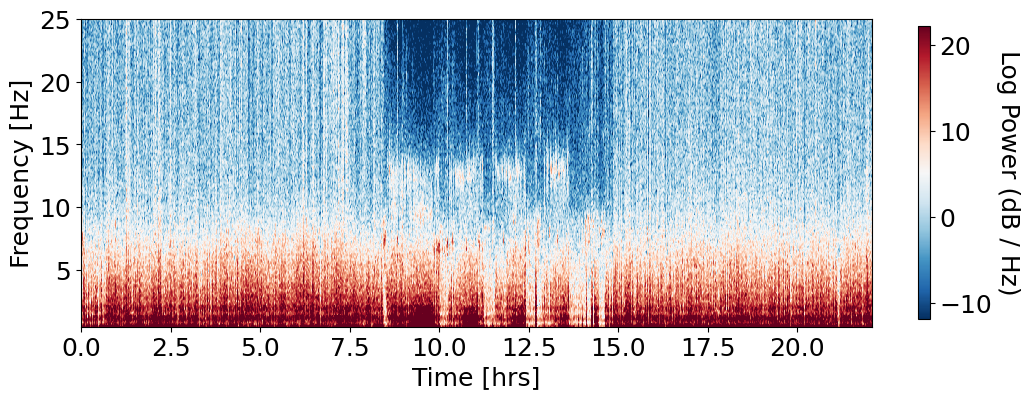

In [75]:
sf = raw.info["sfreq"]
yasa.plot_spectrogram(data[0], sf)

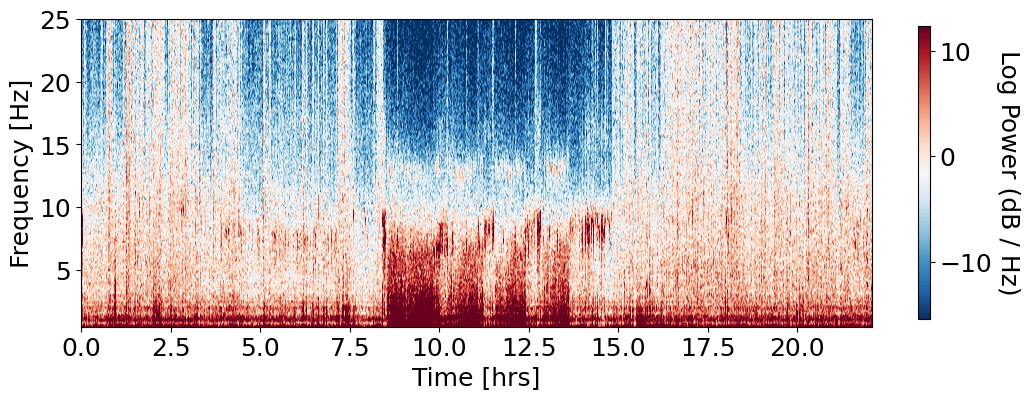

In [76]:
yasa.plot_spectrogram(data[1], sf)